# A Crash Course in ReflectDirect

**Welcome — thanks for downloading!**

`ReflectDirect` is designed for anyone interested in reflected light from directly-imaged planets.

If you're looking for an overview of what you can do with it, you're in the right place.

Before you get started, **make sure your Jupyter Notebook, scipy, matplotlib, and ipywidgets are up to date.**

## A Little Setup

At the simplest level you need only two statements after downloading from GitHub:

In [1]:
import reflectdirect as refdir

%matplotlib inline

**Important:** put the path to the `ReflectDirect` folder `'png_maps'` here. It will make importing brightness maps easier.

Example: `map_source = '/Users/Bozo/Some_random_place/ReflectDirect-master/png_maps/'`.

I recommend putting any other png images you want use into this folder, as well.

In [2]:
map_source = '...../png_maps/'

And in case you need them in-notebook, here are the rest of the imports from inside the package:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as pat
import ipywidgets as widgets

from numpy.lib import stride_tricks
from scipy.special import sph_harm
from scipy.interpolate import RectBivariateSpline
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png
from ipywidgets import Layout
from IPython.display import display as IPy_display

import exoplanetsubspots as exoss

pi = np.pi

## Things to Reference

We use some conventions to define how planetary systems are aligned and oriented.

Just run `Geometry_Reference` to get a diagram about them. You can save this diagram by passing `ref_save=True`.

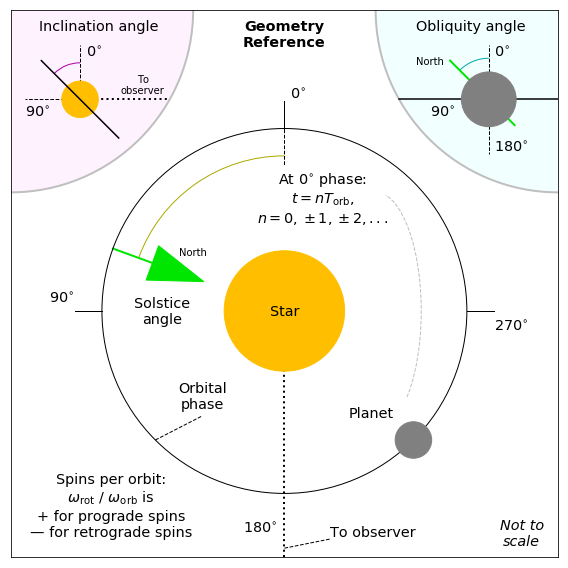

In [4]:
refdir.Geometry_Reference()

The heart of `ReflectDirect` is the class `DirectImaging_Planet`. It's how you create, interact with, and analyze your planets.

You can see the class details (methods, attributes, etc.) in the print below.

By the way, **all public methods in our package have full docstrings**, so use them for help!

In [5]:
print(refdir.DirectImaging_Planet.__doc__)

An exoplanet that is directly imaged using reflected starlight.

    This class is based on the model, equations, and discussion of
    Schwartz et al. (2016). It has two sets of planetary parameters,
    a master and an alternate, that users control. These sets make
    calling many of the class methods simple and consistent. Several
    methods store figures (those marked *fig*) that can be saved later.

    Planet coordinates are colatitude and longitude. Orbital phase
    is zero when planet is opposite star from observer and
    increases CCW when system is viewed above star's North pole.

    Methods:
        **Update Param Sets**
        :func:`Adjust_Geometry`
        :func:`Adjust_MotionTimes`
        :func:`Build_Amap`
        :func:`InvertFlipBlend_Amap`
        :func:`Setup_ProRet_Degeneracy`
        
        **Use Param Sets**
        :func:`EquiRect_Amap`  *fig*
        :func:`Geometry_Diagram`  *fig*
        :func:`Info_Printout`
        :func:`KChar_Evolve_Plot`  *fig*


## Make a Planet

Because `DirectImaging_Planet` is a class, most of its attributes are adjustable/persistent for each instance you call. That's handy, as you'll find.

We will stick with a single instance in this demo, so choose a value (1-6) for `ex_system_num` to create your planet.

(FYI, there are more images in the `'png_maps'` folder than shown in this demo.)

In [6]:
ex_system_num = 1

### 1: The default spherical harmonics
if ex_system_num == 1:
    planet = refdir.DirectImaging_Planet()

### 2: Different spherical harmonics
elif ex_system_num == 2:
    planet = refdir.DirectImaging_Planet(kind='ylm',mp_data=[[1,0,1.0],[5,-4,1.0],[4,0,1.0]],
                                         primeD=45,alb_lims=[-1,1],name='YLM Ball')
    planet.InvertFlipBlend_Amap(blend='EW')

### 3: A random checkerboard array (Try changing `kind` to 'aryI', too.)
elif ex_system_num == 3:
    an_ary = np.random.random((10,20))
    an_ary[an_ary > 0.5] = 1
    an_ary[an_ary < 1] = 0
    planet = refdir.DirectImaging_Planet(kind='aryA',mp_data=an_ary,name='Checkerboard')

### 4: An Exo-Earth image
elif ex_system_num == 4:
    planet = refdir.DirectImaging_Planet(kind='pngI',mp_data=map_source+'bluemarble_2048.png',
                                         alb_lims=[0.1,0.85],n_clat=91,n_long=181,ratRO=36,
                                         name='Exo-Earth')
    planet.Setup_ProRet_Degeneracy()

### 5: An image with a bright swath, like a glow worm.
elif ex_system_num == 5:
    planet = refdir.DirectImaging_Planet(kind='pngA',mp_data=map_source+'glow_worm.png',
                                         alb_lims=[0,10],name='Glow Worm')
    planet.InvertFlipBlend_Amap(blend='NS')

### 6: Pacman!
elif ex_system_num == 6:
    planet = refdir.DirectImaging_Planet(kind='pngI',mp_data=map_source+'pacman.png',
                                         alb_lims=[0,5],n_clat=181,n_long=361,name='Pacman')
    planet.Adjust_MotionTimes(rot_res=72)
    planet.InvertFlipBlend_Amap(image='mast',into='alt',invert=False,flip='NS',blend='none')

Now use `EquiRect_Amap` to see how your planet looks. By default you get both the master and alternate brightness maps.

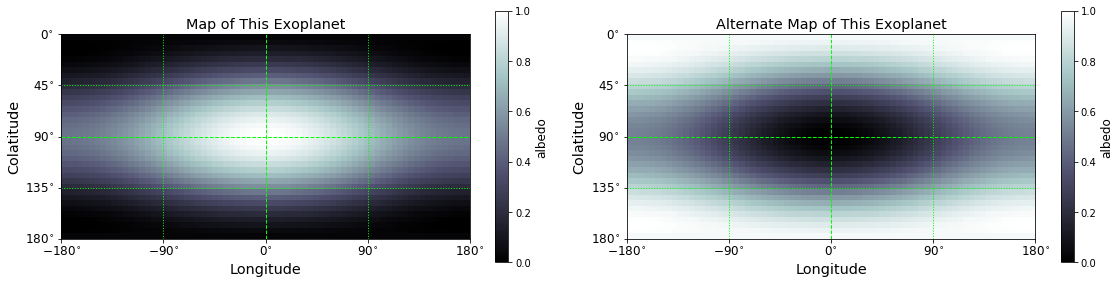

In [7]:
planet.EquiRect_Amap()

At first, your planet has a near-edge-on orbit with no tilt, and its `times` span -0.5 to 0.5 orbits.

One way to change this setup is by using `Adjust_Geometry` and `Adjust_MotionTimes`. Try setting `demo_adjust=True` if you want.

In [8]:
demo_adjust = True

if demo_adjust == True:
    planet.Adjust_Geometry(which='both',incD=63,oblD=35,solD=285)
    planet.Adjust_MotionTimes(which='both',ratRO=3.0,orb_min=0.3,orb_max=3.7)

Then, use `Info_Printout` to view your parameters. It's a quick way to check an instance.

In [9]:
planet.Info_Printout()

Below are some parameters you are using to model This Exoplanet.

  **Grid**       Number      Separation (deg) 
Colatitudes        37              5.00       
Longitudes       72(+1)            5.00       

 **Albedo Map**       Low          Average          High         Realistic?   
Master               0.000          0.500          1.000            Yes       
Alternate            0.000          0.499          1.000            Yes       

  **Motion**    Orbital Period (units)   Rot./Orb. Frequency    Low t (orbits)    High t (orbits) 
Master                 8640.000                 3.0000              0.3000            3.7000      
Alternate              8640.000                 3.0000            ((0.3000))        ((3.7000))    

 **Geometry**   Inclination (deg)    Obliquity (deg)     Solstice (deg)    t=0 Longitude (deg)  
Master                63.00               35.00              285.00                0.00         
Alternate             63.00               35.00              2

## Analyze Your System

Let's test more features of the class `DirectImaging_Planet`. You can run most things in any order you want.

Also, notice the class docstring (above) says several methods store their figures? Those attributes are each `fig_****` — replace stars with the first 4-5 letters of the method (all lowercase).

#### Geometry

Use `Geometry_Diagram` for an overhead view of the system (like the reference diagram):

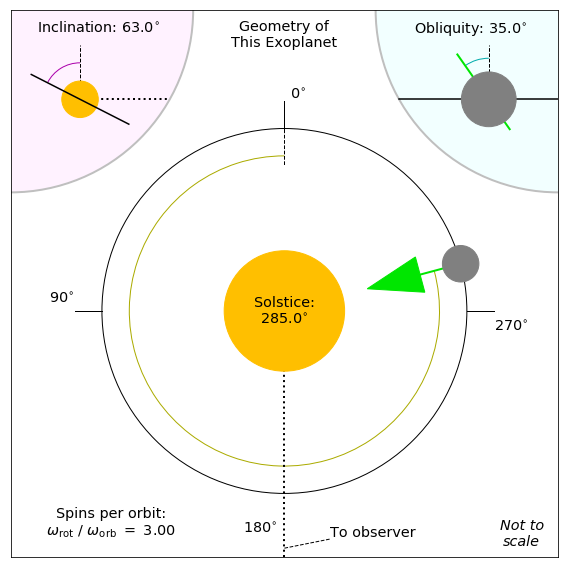

In [10]:
planet.Geometry_Diagram()

Or see things on the observer's line of sight with `Orthographic_Viewer`. Just pass your orbital phase in degrees.

There are different viewing styles here; try `show='real'` for example.

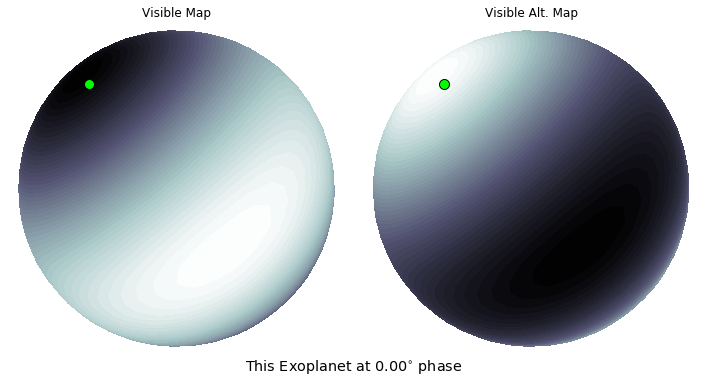

In [11]:
planet.Orthographic_Viewer(0,show='amap',alt=True)

#### Light Curve

Graph some light curves with `LightCurve_Plot`, which uses the attribute `times`.

There are different viewing styles here; try `show='appar'` for example.

(If you want to return actual data, use `Light_Curves` instead.)

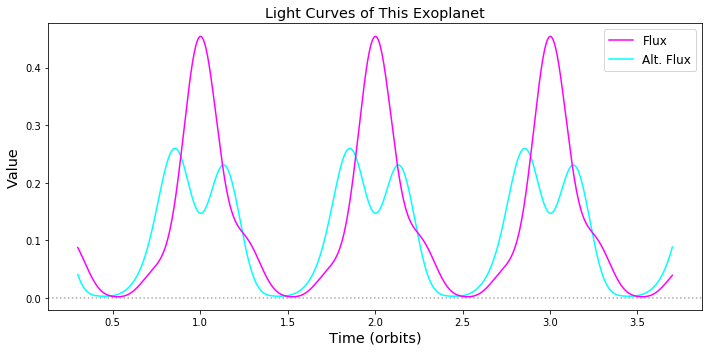

In [12]:
planet.LightCurve_Plot(alt=True,diff=False,show='flux')

#### Kernel

The kernel represents spots on your planet that are both visible *and* lit up.

Want its details at a given phase? Use `Kernels_Plot`.

And add a faint version of your map with `over_amap=True`.

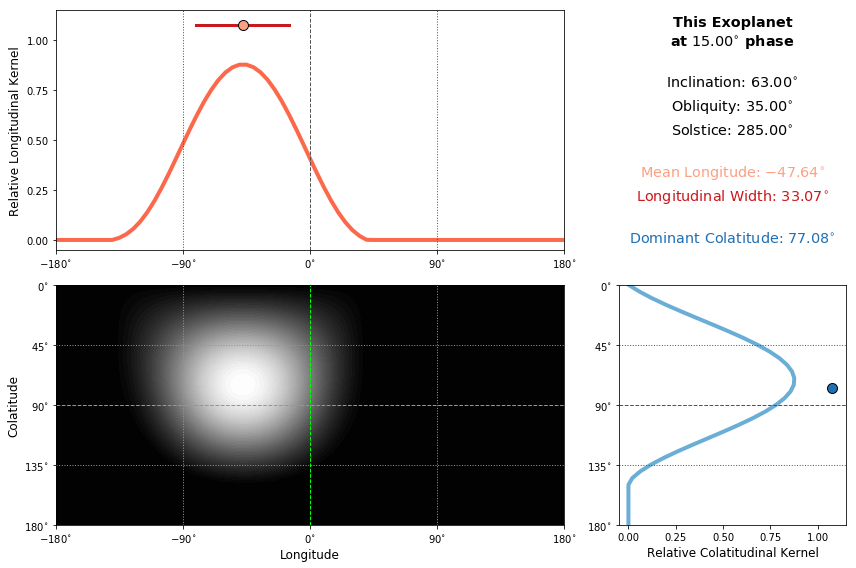

In [13]:
planet.Kernels_Plot(15,over_amap=False)

Or see how the kernel's characteristics evolve over an orbit with `KChar_Evolve_Plot`.

Try passing `'dom'` or `explode='obl'`, for example.

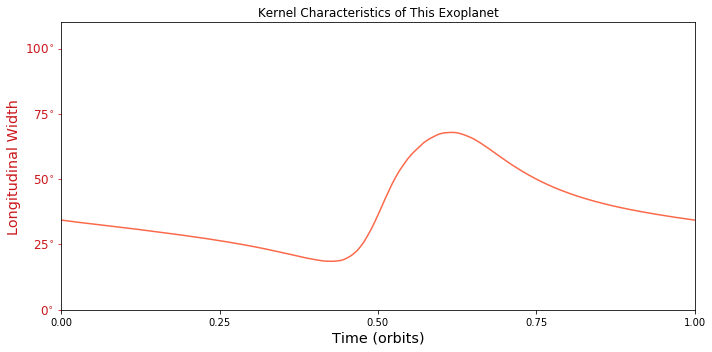

In [14]:
planet.KChar_Evolve_Plot('wid',explode='none',gap=10)

#### Spin Axis

With `SpinAxis_Constraints`, you can predict how real observations might constrain your planet's spin axis. It's all based on the kernel.

Also try `constraint='real'`. This takes longer to calculate but gives you $n$-sigma regions.

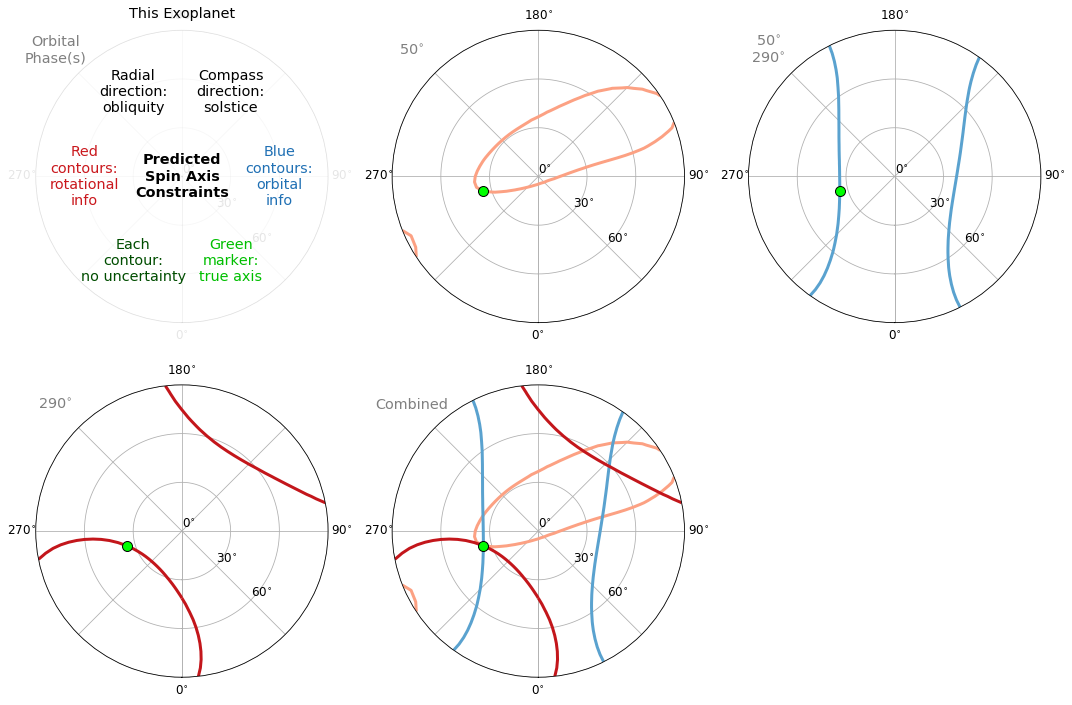

In [15]:
planet.SpinAxis_Constraints(phaseD_list=[50,[50,290],290],constraint='perf')

## Interact in the Sand(box)

The master and alternate parameters are useful. You can compare and contrast specific maps, spin rates, axis alignments, and much more with them.

But sometimes you just want to play in the sand! That's what `Sandbox_Reflection` is for. It combines several methods into one and gives you a bunch of interactive controls.

**If you downloaded this demo**, give it a go below. Protip: use the extra slots. You can see up to 4 phases at a time that way.

In [ ]:
planet.Sandbox_Reflection()

## Just One More Thing...

This demo covers a lot of options, but not *everything* `ReflectDirect` can do.

**Be sure to check out the API and method docstrings for all the details.** Can't stress that enough.

Enjoy!

#### *Questions/Comments/Feedback?*

*Email me:* joelcolinschwartz@gmail.com

*And find more:* __[joelcolinschwartz.com](http://joelcolinschwartz.com)__